# Decode cypher text

### Welcome!
This notebook can decode cypher text. It uses a DFA created by the method outlined here
[Extracting Automata from Recurrent Neural Networks Using Queries and Counterexamples](https://arxiv.org/abs/1711.09576).

In this notebook will automatically train an RNN on symplfied set of english, and extract a DFA from that RNN.


# Code below

In [10]:
from LSTM import LSTMNetwork
from GRU import GRUNetwork
from RNNClassifier import RNNClassifier
from Training_Functions import make_train_set_for_target,mixed_curriculum_train
from Extraction import extract
import time
from memory_profiler import profile
import FalseWordGenerator as FWG

import ALPHABET_7
ALPHABET = ['e','t','a','o','s','i','n']


In [12]:
MEANINGFUL_WORDS = ALPHABET_7.WORDS

MEANINGLESS_WORDS = FWG.generateFalseWords(ALPHABET, MEANINGFUL_WORDS)

def target(w):             
   if w.lower() in MEANINGFUL_WORDS:
      return True
   else:
      return False
    
train_set = {}
train_set.update({w: True for w in MEANINGFUL_WORDS})
train_set.update({w: False for w in MEANINGLESS_WORDS})
print ("made training set of size: " + str(len(train_set)))
print ("of which " + str(len(MEANINGFUL_WORDS)) + str(" are positive"))
print ("of which " + str(len(MEANINGLESS_WORDS)) + str(" are negative"))

made training set of size: 1357
of which 1023 are positive
of which 952 are negative


# Train and extract with a small network

In [13]:
rnnSmall = RNNClassifier(ALPHABET,num_layers=2,hidden_dim=5,RNNClass = LSTMNetwork)

current average loss is:  0.5241492698349344
current average loss is:  0.4056014403752389
current average loss is:  0.37529194098236646
current average loss is:  0.3603774850137506
current average loss is:  0.3465714486721889


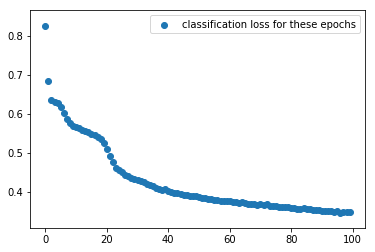

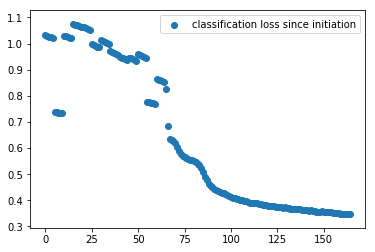

current average loss is:  0.33831926541198415
current average loss is:  0.33434177024801953
current average loss is:  0.33037167396629746
current average loss is:  0.3263878818812753
current average loss is:  0.3223869081973678


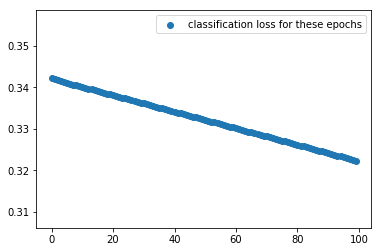

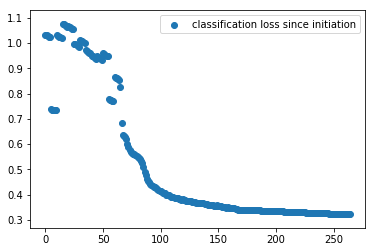

current average loss is:  0.3143758847948588
current average loss is:  0.30677518236183365
current average loss is:  0.29948489108093884
current average loss is:  0.29321182753284913
current average loss is:  0.28334568768842816


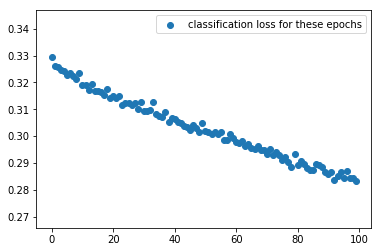

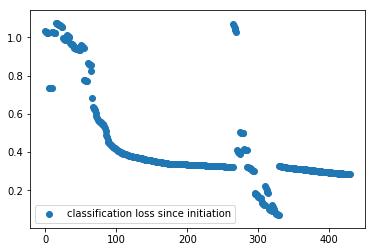

current average loss is:  0.2753151968813329
current average loss is:  0.27176326113583504
current average loss is:  0.2679684666385524
current average loss is:  0.2642379906920712
current average loss is:  0.26056571628736414


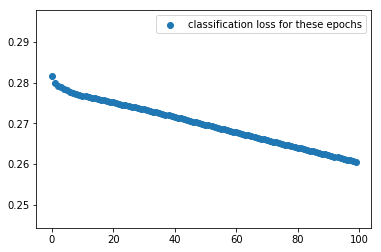

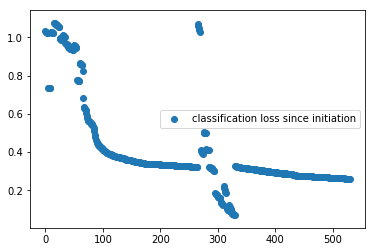

current average loss is:  0.26313709653785067
current average loss is:  0.2549788283590214
current average loss is:  0.24964825692731618
current average loss is:  0.24397127489369227
current average loss is:  0.23964357878819467


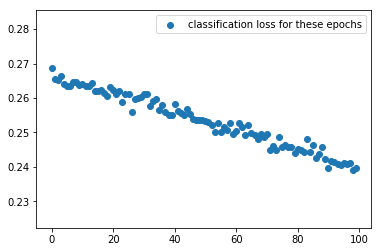

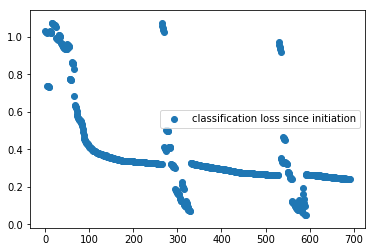

current average loss is:  0.226978366657839
current average loss is:  0.2229833525599323
current average loss is:  0.21888113338102202
current average loss is:  0.21476672516206477
current average loss is:  0.21067019570110998


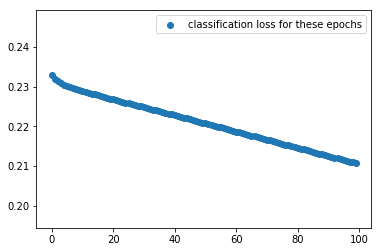

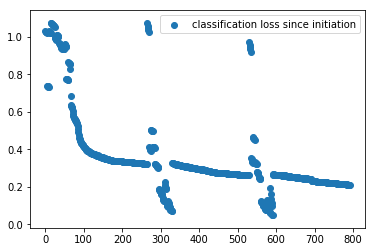

classification loss on last batch was: 0.21067019570110998


In [14]:
mixed_curriculum_train(rnnSmall,train_set,stop_threshold = 0.05)

In [15]:
all_words = sorted(list(train_set.keys()),key=lambda x:len(x))
pos = next((w for w in all_words if rnnSmall.classify_word(w)==True),None)
neg = next((w for w in all_words if rnnSmall.classify_word(w)==False),None)
starting_examples = [w for w in [pos,neg] if not None == w]
starting_examples = ['test', 'not']

In [16]:
rnnSmall.renew()

provided counterexamples are: ['test', 'not']
obs table refinement took 0.0
guided starting equivalence query for DFA of size 2


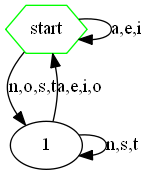

storing provided counterexample of length 4
returning counterexample of length 4:		test, this counterexample is accepted by the given RNN.
equivalence checking took: 0.072501314000192
obs table refinement took 0.064
guided starting equivalence query for DFA of size 13


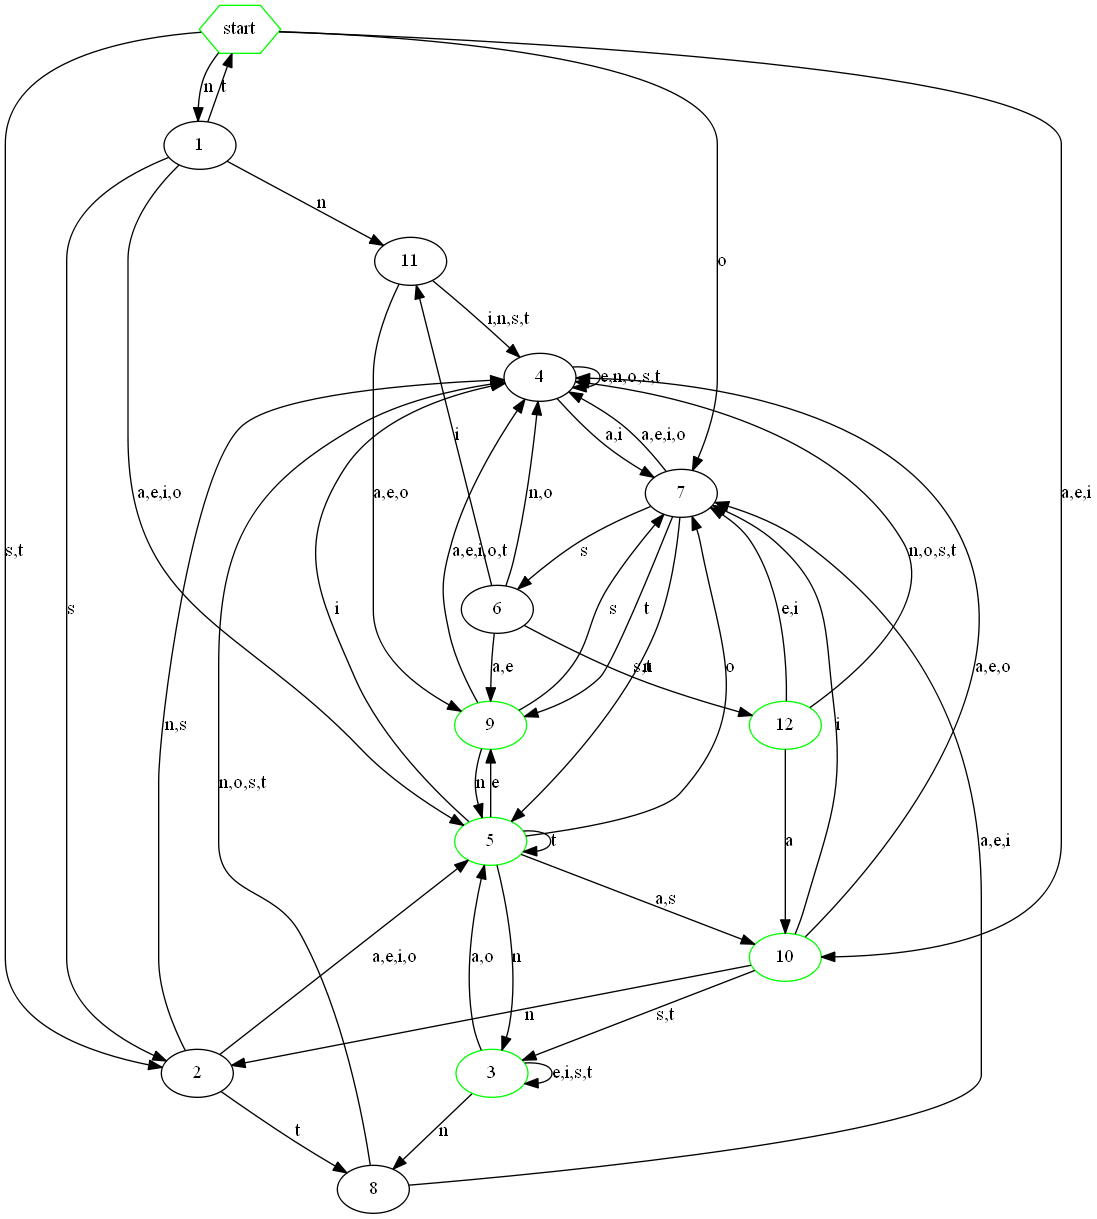

['', 'e']
returning counterexample of length 2:		ea, this counterexample is accepted by the given RNN.
equivalence checking took: 0.14106477999985145
obs table refinement took 0.332
guided starting equivalence query for DFA of size 43
['', 'e']
refining, H size is 1
split wasn't perfect: gotta start over
['e', 'a']
returning counterexample of length 2:		aa, this counterexample is accepted by the given RNN.
equivalence checking took: 0.028775183999869114
obs table refinement took 1.289
guided starting equivalence query for DFA of size 110
['e', 'a']
refining, H size is 1
['a', 'o']
refining, H size is 1
['t', 's']
['t', 's', 'n']
returning counterexample of length 5:		tnast, this counterexample is rejected by the given RNN.
equivalence checking took: 0.004883411000037086
obs table refinement took 8.506
guided starting equivalence query for DFA of size 263
['t', 's']
['t', 's', 'n']
refining, H size is 2
['ea', 'eo']
refining, H size is 1
['tt', 'ts']
returning counterexample of length 6

In [ ]:
dfa = extract(rnnSmall,time_limit = 600, initial_split_depth = 10, starting_examples = starting_examples)

# Train and Extract with a deep network

In [ ]:
rnnDeep = RNNClassifier(ALPHABET,num_layers=2,hidden_dim=50,RNNClass = LSTMNetwork)

In [ ]:
mixed_curriculum_train(rnnDeep,train_set,stop_threshold = 0.05)

In [ ]:
all_words = sorted(list(train_set.keys()),key=lambda x:len(x))
print (all_words)
pos = next((w for w in all_words if rnnDeep.classify_word(w)==True),None)
neg = next((w for w in all_words if rnnDeep.classify_word(w)==False),None)
starting_examples = [w for w in [pos,neg] if not None == w]
starting_examples = ['test', 'not']

In [ ]:
rnnDeep.renew()

In [ ]:
dfa = extract(rnnSmall,time_limit = 600, initial_split_depth = 10, starting_examples = starting_examples)

#### 3.4. Get stats
Display the extracted DFA by using the `draw_nicely` function, which has optional parameters `maximum` (default $60$) and `force` (default `False`), and will only draw the DFA if it has less than `maximum` states or `force` is set to `True`.

Print some statistics you might find interesting about the network, such as the trained RNN's accuracy against its target, the extracted DFA's accuracy against the RNN, and the extracted DFA's accuracy against the original RNN's target.

In [11]:
'''
from math import pow
def percent(num,digits=2):
    tens = pow(10,digits)
    return str(int(100*num*tens)/tens)+"%"

dfa.draw_nicely(maximum=30) #max size willing to draw

test_set = train_set 
print("testing on train set, i.e. test set is train set")
# we're printing stats on the train set for now, but you can define other test sets by using
# make_train_set_for_target

n = len(test_set)
print("test set size:", n)
pos = len([w for w in test_set if target(w)])
print("of which positive:",pos,"("+percent(pos/n)+")")
rnn_target = len([w for w in test_set if rnn.classify_word(w)==target(w)])
print("rnn score against target on test set:",rnn_target,"("+percent(rnn_target/n)+")")
dfa_rnn = len([w for w in test_set if rnn.classify_word(w)==dfa.classify_word(w)])
print("extracted dfa score against rnn on test set:",dfa_rnn,"("+percent(dfa_rnn/n)+")")
dfa_target = len([w for w in test_set if dfa.classify_word(w)==target(w)])
print("extracted dfa score against target on rnn's test set:",dfa_target,"("+percent(dfa_target/n)+")")
'''

NameError: name 'dfa' is not defined

Rotation Cypher Checker

In [12]:
def rtCyCdecode(message):  # Rotation cypher decode
    msgList = list(message.lower())
    letterList = ['a', 'e', 'i', 'n', 'o', 's', 't']
    convertedMsgList = []

    for i in range(1, len(letterList)):
        convertedMsg = ""
        for letter in msgList:
            lIndex = letterList.index(letter)
            newLIndex = (lIndex + i) % len(letterList)
            convertedMsg += letterList[newLIndex]
        convertedMsgList.append(convertedMsg)

    return convertedMsgList

In [13]:
@profile(precision=8)
def checkRNN(convertedMsgList):
    for convertedMsg in convertedMsgList:
        if rnn.classify_word(convertedMsg):
            print("Cyphered Message is English", convertedMsg, "in RNN")
            return True

In [14]:
@profile(precision=8)
def checkDFA(convertedMsgList):
    for convertedMsg in convertedMsgList:
        if dfa.classify_word(convertedMsg):
            print("Cyphered Message is English", convertedMsg, "in DFA")
            return True

In [15]:
def rtCyChecker(message):  # Rotation cypher checker
    convertedMsgList = rtCyCdecode(message)
    foundKeyRNN = False
    foundKeyDFA = False
    print("Try message in following list", '\n', convertedMsgList)

    startRNN = time.time()
    if checkRNN(convertedMsgList):
        foundKeyRNN = True
    executeTimeRNN = time.time() - startRNN
    print("RNN execution time", executeTimeRNN)

    startDFA = time.time()
    if checkDFA(convertedMsgList):
        foundKeyDFA = True
    executeTimeDFA = time.time() - startDFA
    print("DFA execution time", executeTimeDFA)

    if foundKeyRNN != foundKeyDFA:
        print("RNN and DFA returned different result")

    if not foundKeyRNN and not foundKeyDFA:
        print("No rotation cyphered message founded")

In [16]:
rtCyChecker(message)        # Call above functions

NameError: name 'message' is not defined